# Loan Predictor

Many bank frauds are happening these days and the bank loses a huge sum of money because of these frauds. So efforts must be made to predict the capability of the individual in paying back the loan. Banks would give loans to only those customers that are eligible so that they can be assured of getting the money back. This project helps to predict loan repayment possibility of an individual taking in consideration parameters such as Age, Education, Gender, Principal amount and Terms. It uses various machine learning algorithms to have the best accuracy.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [26]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-13 19:32:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-13 19:32:38 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [27]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [28]:
df.shape

(346, 10)

### Convert to date time object 

In [29]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [30]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [31]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

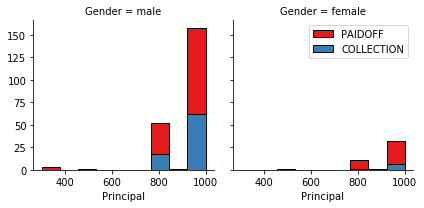

In [32]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

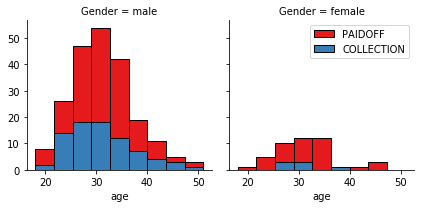

In [33]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

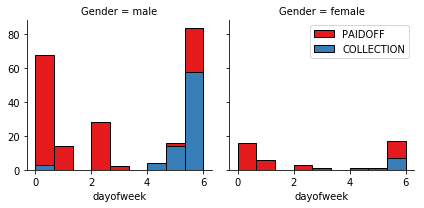

In [34]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [35]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [36]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [37]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [38]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [39]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [40]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [41]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [42]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [43]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [209]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((276, 8), (70, 8), (276,), (70,))

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n=KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
yhat=n.predict(X_test)
print("Train: ",accuracy_score(y_train,n.predict(X_train)))
print("Test: ",accuracy_score(y_test,yhat))

Train:  0.8152173913043478
Test:  0.6857142857142857


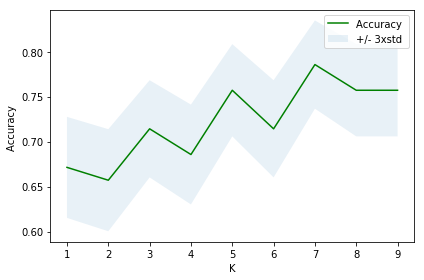

In [142]:
ks=10
m=np.zeros(ks-1)
std=np.zeros(ks-1)
for i in range(1,ks):
    n=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=n.predict(X_test)
    m[i-1]=accuracy_score(y_test,yhat)
    std[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,ks),m,'g')
plt.fill_between(range(1,ks),m-std,m+std,alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [143]:
print("Best accuracy at",m.max(),"k=",m.argmax()+1)

Best accuracy at 0.7857142857142857 k= 7


In [144]:
n1=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
yhat1=n1.predict(X_test)
print("Train:",accuracy_score(y_train,n1.predict(X_train)))
print("Test:",accuracy_score(y_test,yhat1))

Train: 0.8079710144927537
Test: 0.7857142857142857


# Decision Tree

In [210]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train,y_train)
yhat2=dt.predict(X_test)
print("Train:",accuracy_score(y_train,dt.predict(X_train)))
print("Test:",accuracy_score(y_test,yhat2))

Train: 0.7463768115942029
Test: 0.6142857142857143


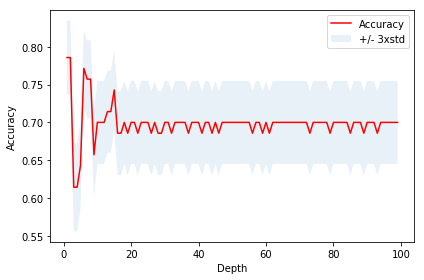

In [154]:
lvls=100
mean=np.zeros((lvls-1))
std=np.zeros((lvls-1))
for i in range(1,lvls):  
    t=DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(X_train,y_train)
    yhat=t.predict(X_test)
    mean[i-1]=accuracy_score(y_test,yhat)
    std[i-1]=np.std(y_test==yhat)/np.sqrt(yhat.shape[0])
plt.plot(range(1,lvls),mean,'r')
plt.fill_between(range(1,lvls),mean-1*std,mean+1*std,alpha=0.1)
plt.legend(('Accuracy','+/- 3xstd'))
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [155]:
print("Best accuracy at",mean.max(),"Depth=",mean.argmax()+1)

Best accuracy at 0.7857142857142857 Depth= 1


In [157]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=1).fit(X_train,y_train)
yhat2=dt1.predict(X_test)
print("Train: ",accuracy_score(y_train,dt1.predict(X_train)))
print("Test: ",accuracy_score(y_test,yhat2))

Train:  0.7427536231884058
Test:  0.7857142857142857


# Support Vector Machine

In [182]:
from sklearn import svm
from sklearn.metrics import f1_score,jaccard_similarity_score

clf2=svm.SVC(kernel='rbf',gamma='auto').fit(X_train,y_train)
yhat3=clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

Avg F1-score: 0.7276
Jaccard score: 0.7429


In [170]:
clf=svm.SVC(kernel='sigmoid',gamma='auto').fit(X_train,y_train)
yhat3=clf.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

Avg F1-score: 0.6893
Jaccard score: 0.7429


In [171]:
clf=svm.SVC(kernel='poly',gamma='auto').fit(X_train,y_train)
yhat3=clf.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

Avg F1-score: 0.7065
Jaccard score: 0.7714


In [173]:
clf1=svm.SVC(kernel='linear',gamma='auto').fit(X_train,y_train)
yhat3=clf1.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

Avg F1-score: 0.6914
Jaccard score: 0.7857


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
yhat4=lr.predict(X_test)
yhat4_prob=lr.predict_proba(X_test)
print ("LogLoss: %.2f" % log_loss(y_test, yhat4_prob))
print(f"jaccard_similarity_score: %.4f" % jaccard_similarity_score(y_test, yhat4))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))

LogLoss: 0.58
jaccard_similarity_score: 0.6857
Avg F1-score: 0.6671


In [134]:
lr=LogisticRegression(C=0.01,solver='sag').fit(X_train,y_train)
yhat4=lr.predict(X_test)
yhat4_prob=lr.predict_proba(X_test)
print ("LogLoss: %.2f" % log_loss(y_test, yhat4_prob))
print(f"jaccard_similarity_score: %.4f" % jaccard_similarity_score(y_test, yhat4))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))

LogLoss: 0.49
jaccard_similarity_score: 0.7857
Avg F1-score: 0.6914


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
lr=LogisticRegression(C=0.01,solver='saga').fit(X_train,y_train)
yhat4=lr.predict(X_test)
yhat4_prob=lr.predict_proba(X_test)
print ("LogLoss: %.2f" % log_loss(y_test, yhat4_prob))
print(f"jaccard_similarity_score: %.4f" % jaccard_similarity_score(y_test, yhat4))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))

LogLoss: 0.49
jaccard_similarity_score: 0.7857
Avg F1-score: 0.6914


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
lr=LogisticRegression(C=0.01,solver='newton-cg').fit(X_train,y_train)
yhat4=lr.predict(X_test)
yhat4_prob=lr.predict_proba(X_test)
print ("LogLoss: %.2f" % log_loss(y_test, yhat4_prob))
print(f"jaccard_similarity_score: %.4f" % jaccard_similarity_score(y_test, yhat4))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))

LogLoss: 0.49
jaccard_similarity_score: 0.7857
Avg F1-score: 0.6914


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [188]:
lr1=LogisticRegression(C=0.01,solver='lbfgs').fit(X_train,y_train)
yhat4=lr1.predict(X_test)
yhat4_prob=lr1.predict_proba(X_test)
print ("LogLoss: %.2f" % log_loss(y_test, yhat4_prob))
print(f"jaccard_similarity_score: %.4f" % jaccard_similarity_score(y_test, yhat4))
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))

LogLoss: 0.49
jaccard_similarity_score: 0.7857
Avg F1-score: 0.6914


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluation using Test set

In [174]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [175]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-13 21:25:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-13 21:25:15 (319 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [200]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [201]:
df = test_df

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature
y_test = df['loan_status'].values
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


# KNN

In [202]:
yknn=n1.predict(X_test)
jknn=jaccard_similarity_score(y_test, yknn)
fknn=f1_score(y_test, yknn, average='weighted')
print(f"jaccard_similarity_score: %.4f" %jknn )
print("Avg F1-score: %.4f" % fknn)

jaccard_similarity_score: 0.6667
Avg F1-score: 0.6328


# Decision Tree

In [203]:
ydt=dt1.predict(X_test)
jdt=jaccard_similarity_score(y_test, ydt)
fdt=f1_score(y_test, ydt, average='weighted')

print(f"jaccard_similarity_score: %.4f" %jdt)
print("Avg F1-score: %.4f" % fdt)

jaccard_similarity_score: 0.7407
Avg F1-score: 0.6304


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [204]:
ysvm=clf2.predict(X_test)
jsvm=jaccard_similarity_score(y_test, ysvm)
fsvm=f1_score(y_test, ysvm, average='weighted')

print(f"jaccard_similarity_score: %.4f" %jsvm)
print("Avg F1-score: %.4f" % fsvm)

jaccard_similarity_score: 0.7963
Avg F1-score: 0.7584


# Logistic Regression

In [205]:
ylr=lr1.predict(X_test)
ylr_prob=lr1.predict_proba(X_test)
llr=log_loss(y_test, ylr_prob)
jlr=jaccard_similarity_score(y_test, ylr)
flr=f1_score(y_test, ylr, average='weighted')

print ("LogLoss: %.2f" %llr)
print(f"jaccard_similarity_score: %.4f" %jlr)
print("Avg F1-score: %.4f" %flr)

LogLoss: 0.52
jaccard_similarity_score: 0.7407
Avg F1-score: 0.6304


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [208]:
Jaccard=[jknn,jdt,jsvm,jlr]
fscore=[fknn,fdt,fsvm,flr]
logloss=['NA','NA','NA',llr]

df={'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'],'Jaccard':Jaccard,'F1-score':fscore,'LogLoss':logloss}
Report=pd.DataFrame(data=df,columns=['Algorithm','Jaccard','F1-score','LogLoss'],index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.666667,0.632840,NA
1,Decistion Tree,0.740741,0.630418,NA
2,SVM,0.796296,0.758350,NA
3,LogisticRegression,0.740741,0.630418,0.516366


Hence we must use **Support Vector Machine(SVM)** as it has the best Jaccard score of 0.79 and F1-score of 0.75.